In [1]:
from ultralytics import YOLO
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# 載入分割模型
model = YOLO(r"D:\ML_2024\pretrain_model\yolov8m-seg.pt")

# 分割自己影像
result_self = model.predict(source=r"D:\ML_2024\HW2\GD.png", conf=0.5, save=True)
result_pilot=model.predict(source=r"D:\ML_2024\HW2\pilot.png", conf=0.5, save=True)
for result in result_pilot:
    for box in result.boxes:
        # 獲取 bounding box 的座標
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()  # 轉為 NumPy 格式
        print(f"Bounding Box: x1={x1}, y1={y1}, x2={x2}, y2={y2}")


image 1/1 D:\ML_2024\HW2\GD.png: 640x480 1 person, 117.4ms
Speed: 42.0ms preprocess, 117.4ms inference, 9.2ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs\segment\predict12

image 1/1 D:\ML_2024\HW2\pilot.png: 384x640 1 person, 113.0ms
Speed: 6.0ms preprocess, 113.0ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\segment\predict12
Bounding Box: x1=381.8432312011719, y1=225.35369873046875, x2=970.28955078125, y2=693.877685546875


[[          0           0           0 ...           0           0           0]
 [          0           0           0 ...           0           0           0]
 [          0           0           0 ...           0           0           0]
 ...
 [          0           0           0 ...           0           0           0]
 [          0           0           0 ...           0           0           0]
 [          0           0           0 ...           0           0           0]]
[  0 255]
(259, 194, 3)


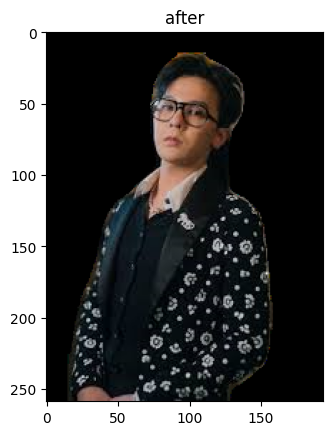

-1

In [4]:
mask_self = result_self[0].masks.data[0].cpu().numpy()
print(mask_self)
mask_self=(mask_self*255).astype('uint8')
print(np.unique(mask_self))
self_img=cv2.imread(r"D:\ML_2024\HW2\GD.png")
mask_self=cv2.resize(mask_self,(self_img.shape[1],self_img.shape[0]))
mask_self=cv2.cvtColor(mask_self,cv2.COLOR_GRAY2BGR)
after_self=cv2.bitwise_and(self_img,mask_self)
print(after_self.shape)
plt.imshow(cv2.cvtColor(after_self,cv2.COLOR_BGR2RGB))
plt.title("after")
plt.show()
cv2.waitKey(0)

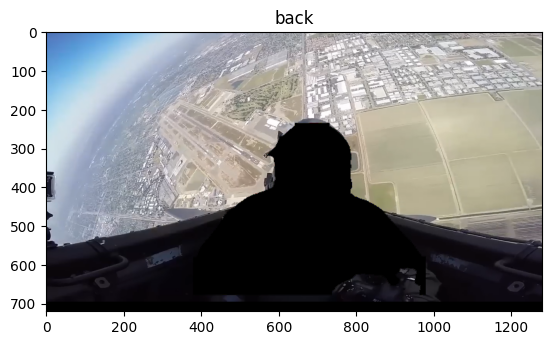

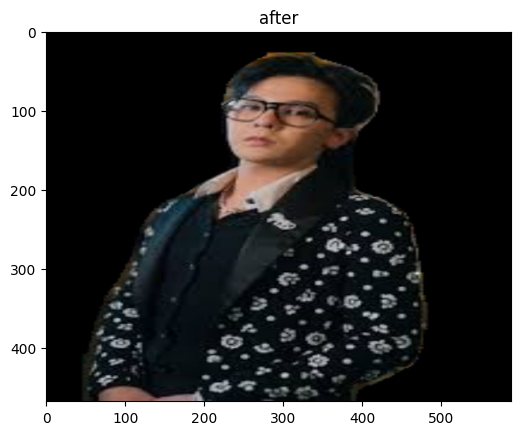

-1

In [5]:
mask_pilot=result_pilot[0].masks.data[0].cpu().numpy()
mask_pilot=(mask_pilot*255).astype('uint8')
# 載入背景圖像
pilot_img = cv2.imread(r"D:\ML_2024\HW2\pilot.png")
mask_pilot=cv2.resize(mask_pilot,(pilot_img.shape[1],pilot_img.shape[0]))
mask_pilot=cv2.cvtColor(mask_pilot,cv2.COLOR_GRAY2BGR)
front=cv2.bitwise_and(pilot_img,mask_pilot)
back=cv2.subtract(pilot_img,front)
plt.figure()
plt.imshow(cv2.cvtColor(back,cv2.COLOR_BGR2RGB))
plt.title("back")
plt.show()
after_self=cv2.resize(after_self,(int(x2)-int(x1),int(y2)-int(y1)))
plt.imshow(cv2.cvtColor(after_self,cv2.COLOR_BGR2RGB))
plt.title("after")
plt.show()
cv2.waitKey(0)

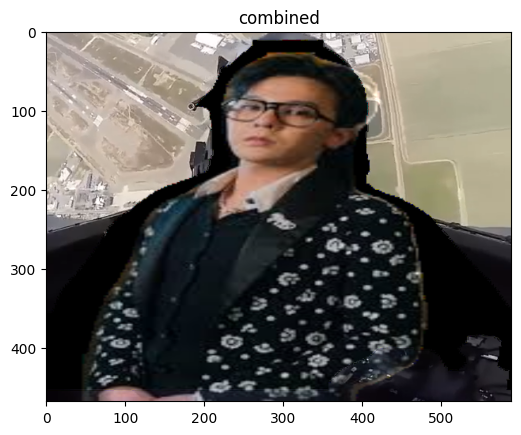

-1

In [6]:
combined = cv2.add(after_self,back[int(y1):int(y2),int(x1):int(x2)] )
plt.imshow(cv2.cvtColor(combined,cv2.COLOR_BGR2RGB))
plt.title("combined")
plt.show()
cv2.waitKey(0)

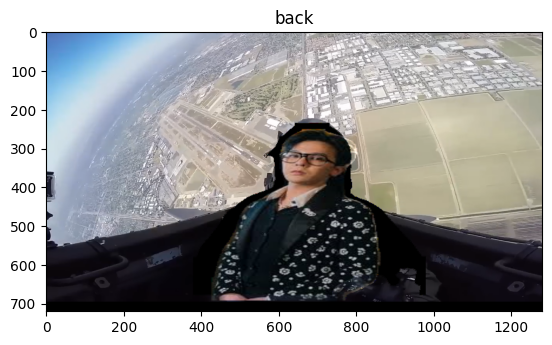

In [7]:
back[int(y1):int(y2),int(x1):int(x2)]=combined
plt.imshow(cv2.cvtColor(back,cv2.COLOR_BGR2RGB))
plt.title("back")
plt.show()